<center> <h1> Ce projet a été réalisé par : Mohammed Ehiri et Moussa Moussaoui  </h1> </center>

#### Pour acceder à l'interface graphique de notre template, il suffit de suivre les etapes suivantes:
- Ouvrir le cmd  
- créer un envirennement virtuel par la commande : python -m venv myenv
- acceder et activer votre envirennement virtuel par la commande : Script\activate 
- se deplacer ver le chemin du ce dossier par la commande : cd 
- tapez la commande :  panel serve Tourisme.ipynb 
- accerder à ce lien sur votre navigateur : http://localhost:5006/Tourisme
# 
# 
    


<hr>

<center><h1 style="color: green; font-weight: bolder;"> Analyse des données touristiques du Maroc </h1></center>
<br>
<br>
<br>


- Importation des modules nécessaires  


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import panel as pn
import seaborn as sns
import matplotlib as plt

import matplotlib.pyplot as plt
pn.extension('tabulator')
import hvplot.pandas


<hr>

- lecture et affichage du dataset 


In [2]:
df = pd.read_csv('data/evolution-par-nationalite-des-arrivees-des-touristes-aux-postes-frontieres-Copie.csv')
df

,nationalite,nombre,year,montant
0,TouristesEtrangers,5011729,2012,57835
1,TouristesEtrangers,5323333,2013,57614
2,TouristesEtrangers,5437453,2014,62034
3,TouristesEtrangers,5151704,2015,61150
4,TouristesEtrangers,5103204,2016,64226
...,...,...,...,...
67,Belgique,238984,2016,64226
68,Belgique,259658,2017,72127
69,Belgique,273535,2018,73039
70,Belgique,272328,2019,78654


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nationalite  72 non-null     object
 1   nombre       72 non-null     int64 
 2   year         72 non-null     int64 
 3   montant      72 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.4+ KB


In [4]:
df.head()

,nationalite,nombre,year,montant
0,TouristesEtrangers,5011729,2012,57835
1,TouristesEtrangers,5323333,2013,57614
2,TouristesEtrangers,5437453,2014,62034
3,TouristesEtrangers,5151704,2015,61150
4,TouristesEtrangers,5103204,2016,64226


In [5]:
df.tail()

,nationalite,nombre,year,montant
67,Belgique,238984,2016,64226
68,Belgique,259658,2017,72127
69,Belgique,273535,2018,73039
70,Belgique,272328,2019,78654
71,Belgique,40603,2020,36364


In [6]:
df.isnull()

,nationalite,nombre,year,montant
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
67,False,False,False,False
68,False,False,False,False
69,False,False,False,False
70,False,False,False,False


In [7]:
df.describe()

,nombre,year,montant
count,7.200000e+01,72.000000,72.000000
mean,1.104669e+06,2016.000000,62560.333333
std,1.723284e+06,2.600108,11620.346672
min,4.060300e+04,2012.000000,36364.000000
25%,2.426072e+05,2014.000000,57835.000000
50%,3.546315e+05,2016.000000,62034.000000
75%,8.307562e+05,2018.000000,72127.000000
max,7.043006e+06,2020.000000,78654.000000


In [8]:
df.sum()

nationalite    TouristesEtrangersTouristesEtrangersTouristesE...
nombre                                                  79536163
year                                                      145152
montant                                                  4504344
dtype: object

In [9]:
df.min()

nationalite    Allemagne
nombre             40603
year                2012
montant            36364
dtype: object

<Axes: >

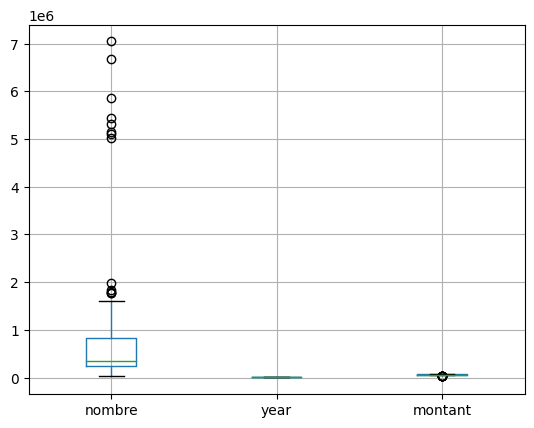

In [10]:
df.boxplot()

<hr>

- l'ajout du dataset en cache pour augmenter la performance </h4> </center>


In [11]:
# cache data to improve dashboard performance
if 'data' not in pn.state.cache.keys():

    df = pd.read_csv('data/evolution-par-nationalite-des-arrivees-des-touristes-aux-postes-frontieres-Copie.csv')

    pn.state.cache['data'] = df.copy()

else: 

    df = pn.state.cache['data']

<hr>

- Rendre le dataset interactif </h2> </center>


In [12]:
idf = df.interactive()


<hr>

- Création d'un slider pour les années</h2> </center>


In [13]:
# Define Panel widgets
year_slider = pn.widgets.IntSlider(name='Year slider', start=2012, end=2020, step=1, value=2015)
year_slider

IntSlider(end=2020, name='Year slider', start=2012, value=2015)

<hr>

- Création d'un widgets RadioButtonGroup qui contient les deux colonnes nombre et montant de notre dataset</h2> </center>


In [14]:
yaxis_t = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['nombre','montant'],
    button_type='success'
)
yaxis_t

RadioButtonGroup(button_type='success', name='Y axis', options=['nombre', 'montant'], value='nombre')

<hr>

- Combinaison du slider et widgets.RadioButtonGroup </h2> </center>


In [15]:
nations = ['TouristesEtrangers', 'France', 'Espagne', 'Royaume-Uni', 'Allemagne', 'Italie', 'Etats Unis', 'Belgique','Hollande','Maghreb','Chine','Scandinavie','MRE']

nombre_pipeline = (
    idf[
        (idf.year <= year_slider) &
        (idf.nationalite.isin(nations))
    ]
    .groupby(['nationalite', 'year'])[yaxis_t].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)
nombre_pipeline



<hr>

- Tracage des graphes </h1> </center>


In [16]:
nombre_plot = nombre_pipeline.hvplot(x = 'year', by='nationalite', y=yaxis_t,line_width=2, title="(Nombre | Monatant total)  de touristes de differentes nationalité par année");
nombre_plot

In [17]:
nombre_table = nombre_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') ;
nombre_table

In [18]:
nombre_scatterplot_pipeline = (
    idf[
        (idf.year == year_slider) &
        ( (idf.nationalite.isin(nations)))
    ]
    .groupby(['nationalite', 'year', 'montant'])['nombre'].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
);

In [19]:
nombre_scatterplot_pipeline

In [20]:
nombre_scatterplot = nombre_scatterplot_pipeline.hvplot(x='nationalite', 
                                                                y=yaxis_t, 
                                                                by='nationalite', 
                                                                size=400, kind="scatter", 
                                                                alpha=0.7,
                                                                legend=False);
nombre_scatterplot

In [21]:
yaxis_t_source = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['nombre','montant'],
    button_type='success'
)

nations_excl_world = ['TouristesEtrangers', 'France', 'Espagne', 'Royaume-Uni', 'Allemagne', 'Italie', 'Etats Unis', 'Belgique','Hollande','Maghreb','Chine','Scandinavie','MRE']

nombre_source_bar_pipeline = (
    idf[
        (idf.year == year_slider) &
        (idf.nationalite.isin(nations_excl_world))
    ]
    .groupby(['year', 'nationalite'])[yaxis_t_source].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
);

In [22]:
nombre_source_bar_plot = nombre_source_bar_pipeline.hvplot(kind='bar', 
                                                     x='nationalite', 
                                                     y=yaxis_t_source, 
                                                     title='nombre et montant des visiteurs par nationnalité',
                                                          color='green');
nombre_source_bar_plot

In [23]:
import hvplot.pandas

hvexplorer = hvplot.explorer(df);
hvexplorer

hvDataFrameExplorer(axes=Axes(explorer=..., height=None, legend='right', logx=False, logy=False, name='Axes03383', responsive=False, shared_axes=True, width=None, xlim=None, ylim=None), by=[], colormapping=Colormapping(clim=None, cmap='kbc_r', cnorm='linear', color=None, colorbar=None, explorer=..., name='Colormapping03411', rescale_discrete_levels=True, symmetric=False), groupby=[], kind='line', labels=Labels(clabel='', explorer=..., fontscale=1, name='Labels03432', rot=0, title='', xlabel='', ylabel=''), name='hvDataFrameExplorer03368', operations=Operations(aggregator=None, datashade=False, dynspread=False, explorer=..., name='Operations03452', rasterize=False, x_sampling=None, y_sampling=None), style=Style(alpha=1, explorer=..., name='Style03472'), x='index', y='nationalite', y_multi=[], z=None)

<hr>

- lecture et affichage du deuxieme dataset </h2> </center>


In [24]:
df1 = pd.read_csv('data/tourism1.csv')
df1

,province,year,visitors
0,Marrakech Mnara,2012,1704466
1,Marrakech Mnara,2013,1945749
2,Marrakech Mnara,2014,2127712
3,Marrakech Mnara,2015,2018946
4,Marrakech Mnara,2016,1836803
...,...,...,...
166,T Bni Anzar,2016,395602
167,T Bni Anzar,2017,348348
168,T Bni Anzar,2018,383462
169,T Bni Anzar,2019,435843


In [25]:
# cache data to improve dashboard performance
if 'data1' not in pn.state.cache.keys():

    df = pd.read_csv('data/tourism1.csv')

    pn.state.cache['data1'] = df.copy()

else: 

    df = pn.state.cache['data1']

In [26]:
df1[df1['province'] == 'Marrakech Mnara']

,province,year,visitors
0,Marrakech Mnara,2012,1704466
1,Marrakech Mnara,2013,1945749
2,Marrakech Mnara,2014,2127712
3,Marrakech Mnara,2015,2018946
4,Marrakech Mnara,2016,1836803
5,Marrakech Mnara,2017,2039428
6,Marrakech Mnara,2018,2554542
7,Marrakech Mnara,2019,3093694
8,Marrakech Mnara,2020,657343


<hr>

- Tracage des graphes en utilisant les fonctions de SEABORN </h2> </center>


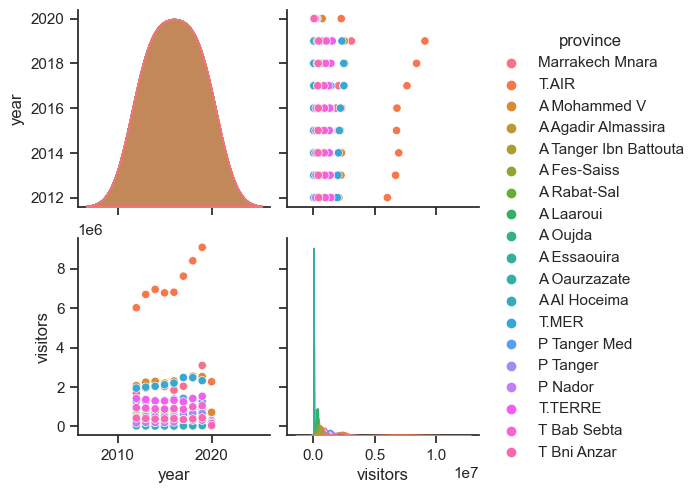

In [27]:
sns.set_theme(style="ticks")
# sns.set(rc={"font.family":"serif", "font.size":12})  # set the font

sns.pairplot(df, hue="province");


C:\myenv\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


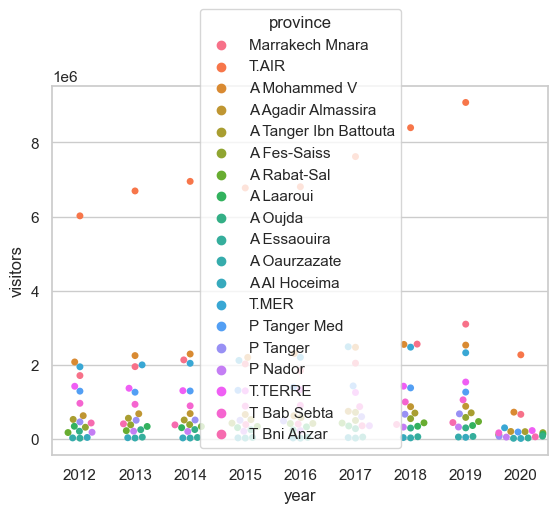

In [28]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.swarmplot(data=df, x="year", y="visitors", hue="province");


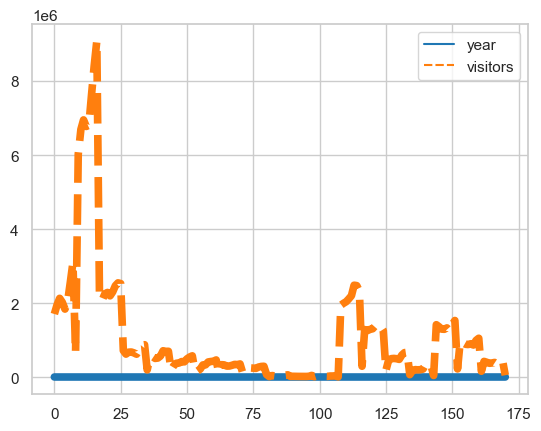

In [29]:

sns.set_theme(style="whitegrid")
#sns.set(rc={"font.family":"serif", "font.size":12})  # set the font
sns.lineplot(data=df, palette="tab10", linewidth=5.5);


C:\Users\-\AppData\Local\Temp\ipykernel_2516\1987815897.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights = df.pivot("province", "year", "visitors")


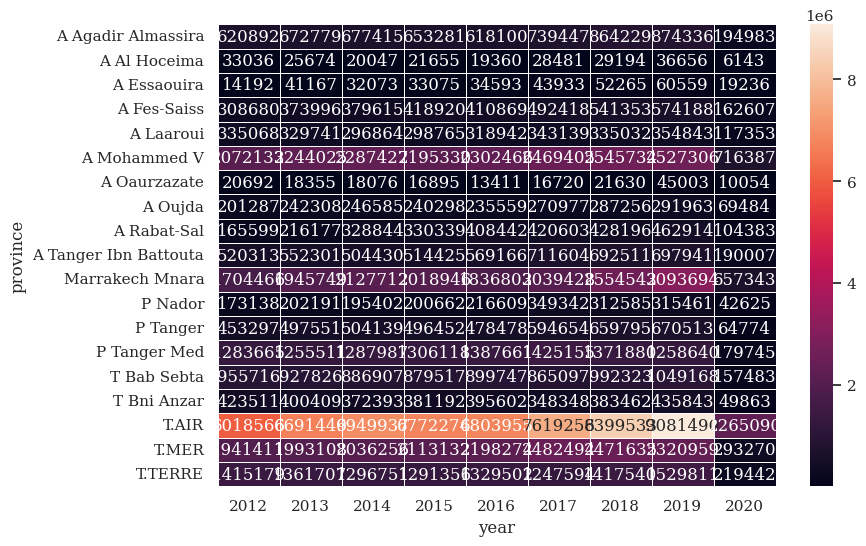

In [30]:
import matplotlib.pyplot as plt
sns.set_theme()
sns.set(rc={"font.family":"serif", "font.size":12})  # set the font

flights = df.pivot("province", "year", "visitors")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax);


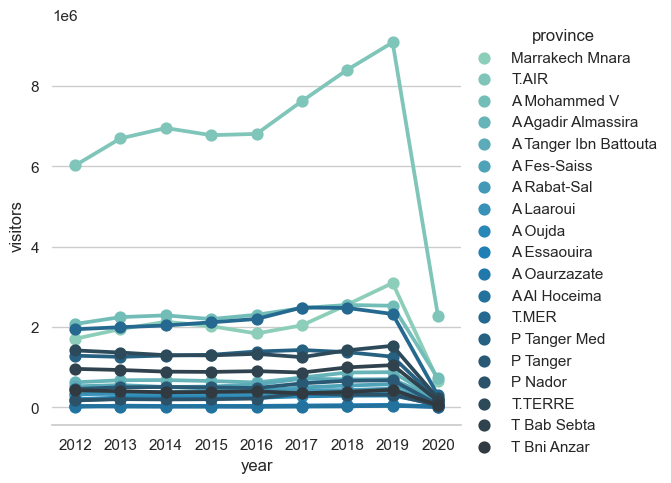

In [31]:
sns.set_theme(style="whitegrid")
#sns.set(rc={"font.family":"serif", "font.size":12})  # set the font

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(
    data=df, x="year", y="visitors", hue="province", 
    capsize=.1, palette="YlGnBu_d", errorbar="se",
    kind="point", aspect=1,
)
g.despine(left=True);


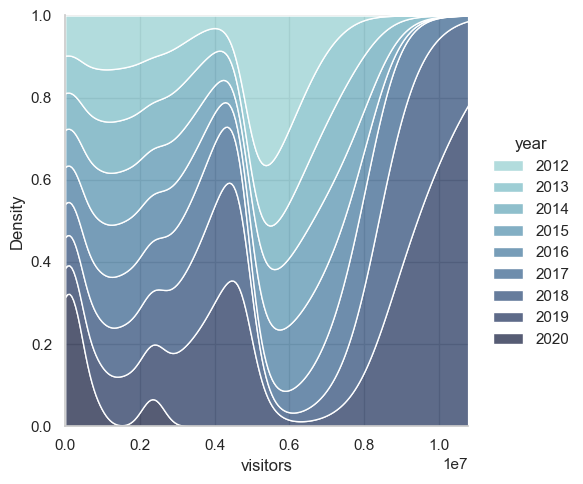

In [32]:
sns.set_theme(style="whitegrid")
#sns.set(rc={"font.family":"serif", "font.size":12})  # set the font
# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=df,
    x="visitors", hue="year",
    kind="kde",
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
);

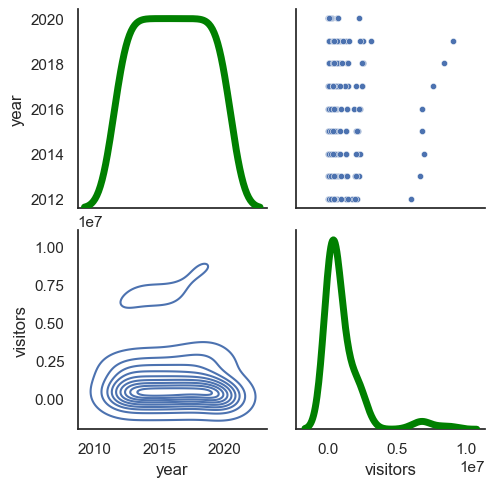

In [33]:
sns.set_theme(style="white")
#sns.set(rc={"font.family":"serif", "font.size":12})  
g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot, s=20)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=5 , color='green');


In [34]:
pd.options.plotting.backend = 'holoviews'

hist1 =df.hist();
hist1

:NdOverlay   [Element]
   :Histogram   [visitors]   (visitors_count)

<hr>

- Rendre le 2eme dataset interctif </h2> </center>


In [35]:
idf1 = df1.interactive();


In [36]:
yaxis_t1 = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['visitors','year'],
    button_type='success'
);
yaxis_t1

RadioButtonGroup(button_type='success', name='Y axis', options=['visitors', 'year'], value='visitors')

In [37]:
provinces = ['Marrakech Mnara', 'T.AIR', 'A Mohammed V', 'A Agadir Almassira','A Tanger Ibn Battouta', 'A Fes-Saiss', 'A Rabat-Sal', 'A Laaroui','A Oujda', 'A Essaouira', 'A Oaurzazate', 'A Al Hoceima', 'T.MER','P Tanger Med', 'P Tanger', 'P Nador', 'T.TERRE', 'T Bab Sebta','T Bni Anzar']
visitor_pipeline = (
    idf1[
        (idf1.year <= year_slider) &
        (idf1.province.isin(provinces))
    ]
    .groupby(['province', 'year'])[yaxis_t1].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
);
visitor_pipeline

In [38]:
visitor_plot = visitor_pipeline.hvplot(x = 'year', by='province', y=yaxis_t1,line_width=1.5, title="Nombre des visiteurs des provinces par année");
visitor_plot

In [39]:
visitor_table = visitor_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
visitor_table

In [40]:
visitor_scatterplot_pipeline = (
    idf1[
        (idf1.year == year_slider) &
        ( (idf1.province.isin(provinces)))
    ]
    .groupby(['province', 'year'])['visitors'].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)
visitor_scatterplot_pipeline

- Tracage des graphes en utilisant le module hvplot</h2> </center>


In [41]:
visitor_scatterplot = visitor_scatterplot_pipeline.hvplot(y='province', 
                                                                x='visitors', 
                                                                by='province', 
                                                                size=200, kind="scatter", 
                                                                alpha=1,
                                                                legend=False)
visitor_scatterplot

In [42]:
yaxis_t_source1 = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['visitors'],
    button_type='success'
)

provinces_excl_world  = ['Marrakech Mnara', 'T.AIR', 'A Mohammed V', 'A Agadir Almassira','A Tanger Ibn Battouta', 'A Fes-Saiss', 'A Rabat-Sal', 'A Laaroui','A Oujda', 'A Essaouira', 'A Oaurzazate', 'A Al Hoceima', 'T.MER','P Tanger Med', 'P Tanger', 'P Nador', 'T.TERRE', 'T Bab Sebta','T Bni Anzar']


visitors_source_bar_pipeline = (
    idf1[
        (idf1.year == year_slider) &
        (idf1.province.isin(provinces_excl_world))
    ]
    .groupby(['year', 'province'])[yaxis_t_source1].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)

In [43]:
visitors_source_bar_plot = visitors_source_bar_pipeline.hvplot(kind='bar', 
                                                     x='province', 
                                                     y=yaxis_t_source1, 
                                                     title='nombre des visiteurs par provinces',
                                                          color='orange');
visitors_source_bar_plot

In [44]:
pd.options.plotting.backend = 'holoviews'

fig1 =idf1.hist();
fig1

In [45]:
import matplotlib.pyplot as plt

bivariate = idf1.hvplot.bivariate('year', 'visitors', legend=False, width=500, height=400) * \
        idf1.hvplot.scatter(  'year', 'visitors', color='black', size=15, legend=False) +\
        idf1.hvplot.table(['year', 'visitors'], width=800, height=500);


In [46]:
bivariate

<hr>

- Association de plusieurs graphes en un seul avec disponibilité de plusieurs options </h1> </center>


In [47]:
import hvplot.pandas

hvexplorer1 = hvplot.explorer(df1);
hvexplorer1

hvDataFrameExplorer(axes=Axes(explorer=..., height=None, legend='right', logx=False, logy=False, name='Axes09296', responsive=False, shared_axes=True, width=None, xlim=None, ylim=None), by=[], colormapping=Colormapping(clim=None, cmap='kbc_r', cnorm='linear', color=None, colorbar=None, explorer=..., name='Colormapping09324', rescale_discrete_levels=True, symmetric=False), groupby=[], kind='line', labels=Labels(clabel='', explorer=..., fontscale=1, name='Labels09345', rot=0, title='', xlabel='', ylabel=''), name='hvDataFrameExplorer09281', operations=Operations(aggregator=None, datashade=False, dynspread=False, explorer=..., name='Operations09365', rasterize=False, x_sampling=None, y_sampling=None), style=Style(alpha=1, explorer=..., name='Style09385'), x='index', y='province', y_multi=[], z=None)

<hr>

- Creation d'une template et la rendre servable sur le web </h2> </center>


In [48]:
template = pn.template.FastListTemplate(
    title='Analyse du secteur touristique au Maroc', 
    sidebar=[
             pn.pane.Markdown("####  Le Maroc est un pays riche en culture, en histoire et en paysages naturels spectaculaires. Le secteur touristique y est donc très développé et représente l'un des principaux contributeurs à l'économie du pays. ."), 
             pn.pane.Markdown("# Choix de l'année :"),   
             year_slider,
             pn.pane.PNG('data/maroc.png', sizing_mode='scale_both')
             ],
    main=[
          pn.pane.Markdown("## Nombres et Montant total des touristes de différentes nationalités par année "),
          pn.Row(pn.Column(yaxis_t, 
                           nombre_plot.panel(width=700), margin=(0,25)), 
                 nombre_table.panel(width=500)), 
          pn.Row(pn.Column(nombre_scatterplot.panel(width=600), margin=(0,25)), 
                 pn.Column(yaxis_t_source, nombre_source_bar_plot.panel(width=600))),
          pn.pane.Markdown(" ### Association de plusieurs Graphes avec plusieurs options "),
          pn.Row(pn.Column(hvexplorer)),
        
          pn.pane.Markdown(" ## Visitrurs de différentes povinces marocaines par année "),
          pn.Row(pn.Column(yaxis_t1, 
                           visitor_plot.panel(width=700), margin=(0,25)), 
                 visitor_table.panel(width=500)), 
          pn.Row(pn.Column(visitor_scatterplot.panel(width=600), margin=(0,25)), 
                 pn.Column(yaxis_t_source1, visitors_source_bar_plot.panel(width=800))),
          pn.Row(pn.Column(hist1)),
          pn.Row(pn.Column(bivariate)),
          pn.pane.Markdown(" ### Plusieurs Graphes avec plusieurs options "),
          pn.Row(pn.Column(hvexplorer1))
        ],
    
    
    
    accent_base_color="red",
    header_background="green",
);
template.servable();

<hr>